# Lösungen zu den Python-Aufgaben aus LE4

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 8: Normen mit Python

Alle $\ell_p$-Vektornormen und daraus abgeleiteten Matrixnormen können direkt mit der folgenden Funktion umgesetzt werden:

In [4]:
def lp_norm( v, p=2 ):
    return (np.sum( np.abs(v)**p ))**(1/p)

In [5]:
v = np.array([1,1,4,6,-1])
lp_norm(v, p=3)

6.565414427346138

In [6]:
A = np.array([[1,1],[3,0]])
lp_norm(A, p=1)

5.0

Die Berechnung der durch Vektornormen induzierten Operatornormen muss individuell gelöst werden:

In [7]:
def sum_norm( A, axis ):
    return np.max(np.sum(A, axis))

def spectral_norm( A ):
    return np.sqrt( np.max( np.linalg.eigvals(A.T.dot(A)) ) )

In [8]:
A

array([[1, 1],
       [3, 0]])

Spaltensummennorm:

In [9]:
sum_norm(A, axis=0)

4

Zeilensummennorm:

In [10]:
sum_norm(A, axis=1)

3

Spektralnorm:

In [11]:
spectral_norm(A)

3.179586801558725

### Berechung mit Numpy

In [12]:
help(np.linalg.norm)

Help on function norm in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these

p-Norm von Vektoren:

In [13]:
np.linalg.norm(v, ord=3)

6.565414427346138

Frobenius:

In [14]:
np.linalg.norm(A, ord='fro')

3.3166247903554

Die Berechnung der Summennorm und der Gesamtnorm ist nicht möglich. Hingegen:

Spektralnorm:

In [15]:
np.linalg.norm(A, ord=2)

3.179586801558725

Zeilen- und Spaltensummennorm:

In [16]:
np.linalg.norm(A, ord=np.inf)

3.0

In [17]:
np.linalg.norm(A, ord=1)

4.0

## Aufgabe 10: Soft-Maximum

Es wurde gezeigt, dass eine $\ell_p$-Vektornorm für grosse $p$ die Maximumsnorm gut annähert. Damit kann also relativ leicht das maximale Element bestimmt werden. Hier ein Vergleich von verschiedenen Werten für $p$:

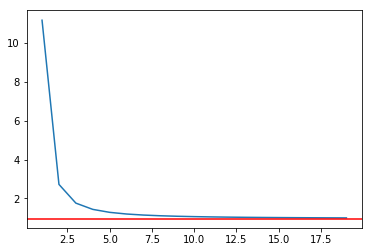

In [18]:
pmax = 20
v = np.random.rand(20)
prange = np.arange(1,pmax,1)
lpnorms = np.array([lp_norm(v,p) for p in prange])
plt.plot( prange, lpnorms )
plt.axhline( np.max(v), color="red" )

Für $p=10$ ergibt sich bereits eine gute Annäherung. Die Funktion 

$$
f(\mathbf{x}) = ||\mathbf{x}||_p = \left(\sum_{i=1}^n |x_i|^p \right)^{1/p}
$$

ist überall ausser in $\mathbf{x} = \mathbf{0}$ differenzierbar.